## imports and data creation

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from numpy import matrix, squeeze, shape, transpose, eye, zeros, cos, sin, pi
from numpy.random import rand, randn, seed
from numpy.linalg import inv, pinv

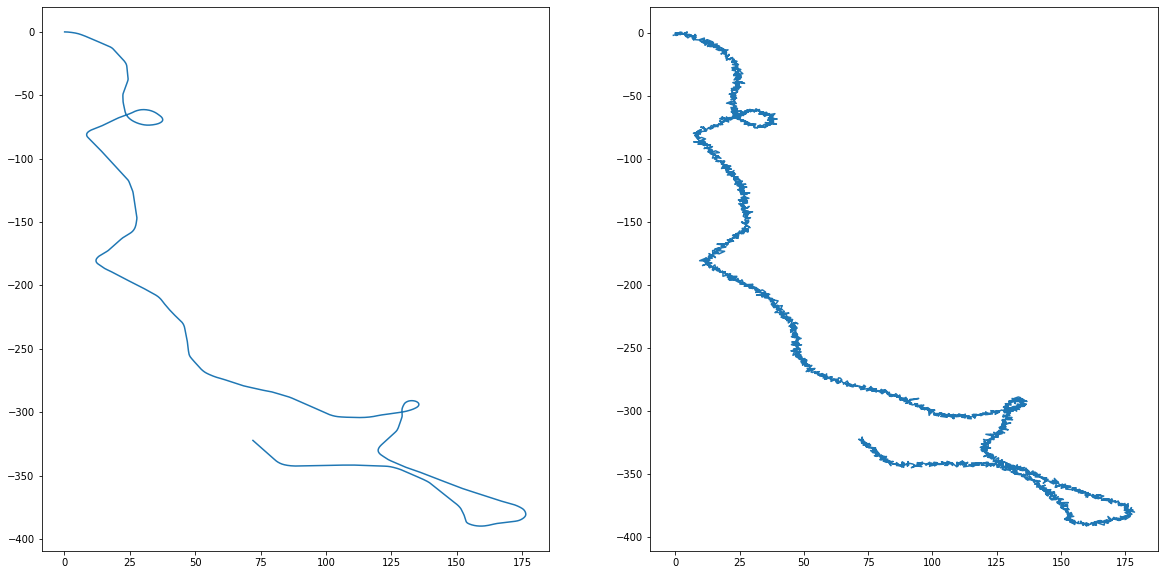

In [ ]:
#title generating the data
R3 = lambda θ: matrix([ [cos(θ), -sin(θ), 0], [sin(θ),  cos(θ), 0], [0,       0,       1]])

R2 = lambda θ: matrix([[cos(θ), -sin(θ)], [sin(θ),  cos(θ)]])

R3i = lambda θ: inv(R3(θ))


J2 = eye(2)

J1 = lambda αl, βl, αr, βr, l: matrix([    [sin(αl + βl),   -cos(αl + βl),   -l * cos(βl)], [sin(αr + βr),   -cos(αr + βr),   -l * cos(βr)] ])


j1 = J1(np.pi/2, 0, -np.pi/2, np.pi, 1)
j1i = pinv(j1);


x = matrix(0.0);
y = matrix(0.0);
θ = matrix(0.0);

vl = rand() * 0.05 + 0.05;
vr = rand() * 0.05 + 0.05;


N    = 2500
data = zeros((N, 5))
seed(0)

for i in range(0,N):
    if i % 10 == 0:
      vl = vl + rand() * 0.2 - 0.05
      vr = vr + rand() * 0.2 - 0.05
    vl = max(-0.1, min(0.3, vl))
    vr = max(-0.1, min(0.3, vr))

    r = R3i(θ[0,0]) @ j1i @ J2 @ transpose(matrix([vl, vr]))
    x = x + r[0]
    y = y + r[1]
    θ = θ + r[2]

    data[i, 0] = x
    data[i, 1] = y
    data[i, 2] = θ
    data[i, 3] = vl
    data[i, 4] = vr
         

noisy_data = zeros((N, 2))
for i in range(0,N):
    noisy_data[i,0] = data[i,0] + randn() * 1
    noisy_data[i,1] = data[i,1] + randn() * 1

plt.rcParams["figure.figsize"] = (20,10)
plt.subplot(1,2,1)
plt.plot(data[:,0], data[:,1])
plt.subplot(1,2,2)
plt.plot(noisy_data[:,0], noisy_data[:,1])


 ## making the Filter

### Julia code

```
function KalmanFilter(y::Vector{Float64}, P::Matrix{Float64}, x::Vector{Float64}, u::Vector{Float64},
    A::Matrix{Float64}, B::Matrix{Float64}, H::Matrix{Float64}, Q::Matrix{Float64}, R::Matrix{Float64})
    Ht = transpose(H)
    At = transpose(A)
    yhat = A * y + B * u
    Phat = A * P * At + Q
    K    = Phat * Ht * inv(H * Phat * Ht + R)
    ynew = yhat + K * (x - H * yhat)
    Pnew = (eye(size(K)[1]) - K * H) * Phat
    return (ynew, Pnew)
end
estimated_states = zeros(N,2)
for i = 1:N
    x = squeeze(noisy_data[i,:],1)
    y, P = KalmanFilter(y, P, x, u, A, B, H, Q, R);
    estimated_states[i,:] = y;
end
```



In [ ]:
#all incoming param must be np arrays/matrices
def KalmanFilter(y, P, x, u, A, B, H, Q, R):
    Ht = transpose(H)
    At = transpose(A)
    yhat = A @ y + B @ u
    Phat = A @ P @ At + Q
    K    = Phat @ Ht @ inv(H @ Phat @ Ht + R)
    ynew = yhat + K @ (x - H @ yhat)
    Pnew = (eye(shape(K)[0]) - K @ H) @ Phat
    return ynew, Pnew

## applying the Filter


```
A = [[1.0 0.0]; [0.0 1.0]];
B = [[0.0 0.0]; [0.0 0.0]];
u = [0.0, 0.0];
H = eye(2)
P = eye(2)
y = [0.0, 0.0];
R = eye(2)*0.0001;
Q = eye(2)*0.000001;
```



```
estimated_states = zeros(N,2)
for i = 1:N
    x = squeeze(noisy_data[i,:],1)
    y, P = KalmanFilter(y, P, x, u, A, B, H, Q, R);
    estimated_states[i,:] = y;
end
```


In [ ]:
A = matrix([[1.0, 0.0], [0.0, 1.0]])
B = matrix([[0.0, 0.0], [0.0, 0.0]])
u = transpose(matrix([0.0, 0.0]))
H = eye(2)
P = eye(2)
y = transpose(matrix([0.0, 0.0]))
R = eye(2)*0.0001;
Q = eye(2)*0.000001;

In [ ]:
estimated_states = zeros((N,2))
for i in range(0,N):
    x = noisy_data[i,:]
    #x = squeeze(noisy_data[i,:])
    y, P = KalmanFilter(y, P, x, u, A, B, H, Q, R);
    estimated_states[i,:] = y[0]

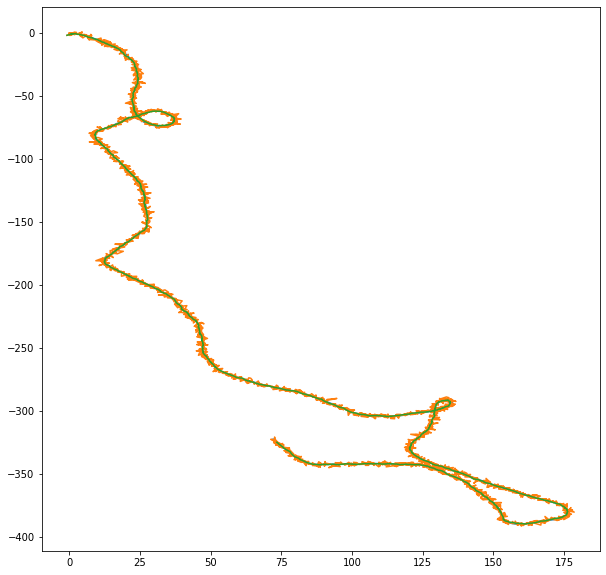

In [ ]:
plt.rcParams["figure.figsize"] = (10,10)
plt.plot(data[:,0], data[:,1])
#plt.subplot(1,3,2)
plt.plot(noisy_data[:,0], noisy_data[:,1])
#plt.subplot(1,3,3)
plt.plot(estimated_states[:,0], estimated_states[:,1])

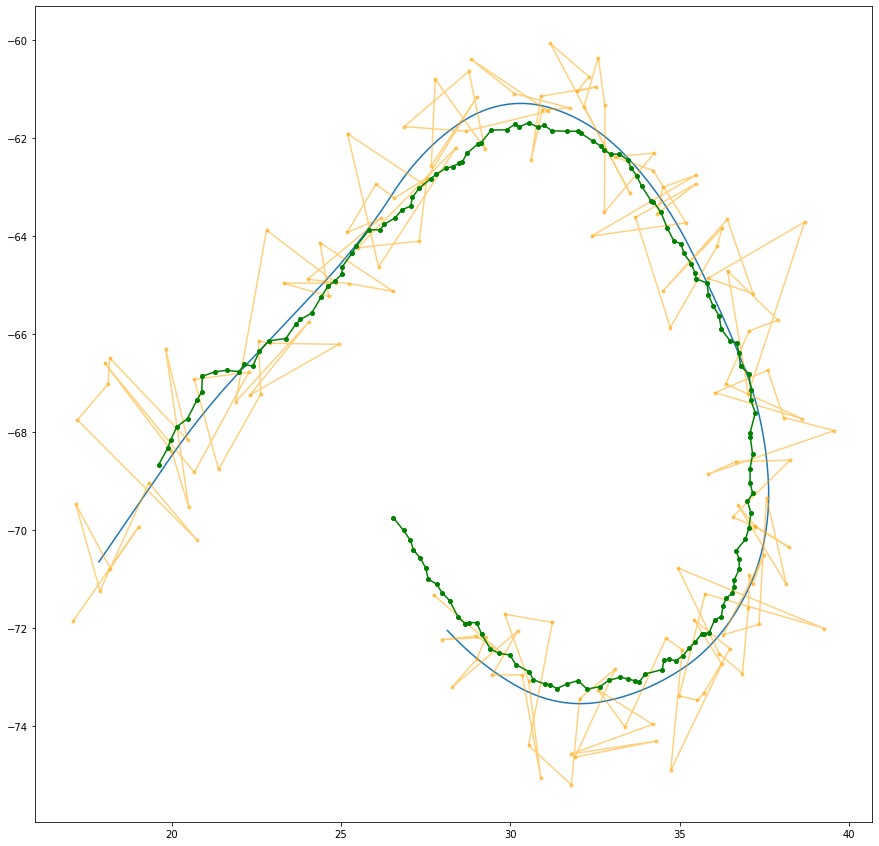

In [ ]:
plt.rcParams["figure.figsize"] = (15,15)
s = 300
e = 450
plt.plot(data[s:e,0], data[s:e,1])
plt.plot(noisy_data[s:e,0], noisy_data[s:e,1], color="orange",linestyle='-', marker='.', alpha=0.5)
plt.plot(estimated_states[s:e,0], estimated_states[s:e,1], color="green", linestyle='-', marker='o', markersize=4)